In [4]:
import networkx as nx
from datetime import datetime
import operator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# stations = pd.read_csv('divvy_2013/Divvy_Stations_2013.csv', parse_dates=['online date'], index_col='id', encoding='utf-8')
# stations.head(10)
# Read the edge list 
df = pd.read_csv('seventh_grade_edge.csv',skiprows=2, header=None, sep=' ')
df.columns = ['student1', 'student2', 'count']
#df = df.loc[df['count'] == 3]

# Read the node metadaa 
meta = pd.read_csv('seventh_grade_node.csv',header=None)
meta.index += 1
meta.columns = ['gender']

df


In [ ]:
# trips = pd.read_csv('divvy_2013/Divvy_Trips_2013.csv', 
#                     parse_dates=['starttime', 'stoptime'], 
#                     index_col=['trip_id'])
# trips = trips.sort_index()
# trips.head(10)

In [ ]:
G = nx.Graph()

for row in df.iterrows():
    G.add_edge(row[1]['student1'], row[1]['student2'],count=row[1]['count'])

# Add node metadata
for n in G.nodes():
    G.node[n]['gender'] = meta.ix[n]['gender']

nx.draw_spectral(G)

In [ ]:
# for r, d in stations.iterrows(): # call the pandas DataFrame row-by-row iterator
#     G.add_node(r, attr_dict=d.to_dict())

In [ ]:
# for (start, stop), d in trips.groupby(['from_station_id', 'to_station_id']):
#     G.add_edge(start, stop, count=len(d))

In [ ]:
degree_centralities = nx.degree_centrality(G)
sorted_degree_cent = sorted(degree_centralities.items(), key=operator.itemgetter(1))
# # plt.hist(degree_centralities)
# # # Set the plot title. 
# # plt.title('Degree Centralities')
sorted_degree_cent

In [ ]:
def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        newG.add_edge(node, neighbor)

    return newG

newG = extract_neighbor_edges2(G, 6)
nx.draw(newG, with_labels=True)

In [ ]:
def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        if (node, neighbor) in G.edges() or (neighbor, node) in G.edges():
            newG.add_edge(node, neighbor)

    return newG

newG = extract_neighbor_edges2(G, 18)
nx.draw(newG, with_labels=True)

In [ ]:
# def maximal_cliqes_of_size(size, G):
#     # Defensive programming check.
#     assert isinstance(size, int), "size has to be an integer"

#     assert size >= 2, "cliques are of size 2 or greater."
#     return [i for i in list(nx.find_cliques(G)) if len(i) == size]

# maximal_cliqes_of_size(5, G_filtered)

In [ ]:
cliques = list(nx.find_cliques(G))
cliques

In [5]:
def load_physicians_network():
    # Read the edge list

    df = pd.read_csv(
        'physicians_dataset.csv',
        sep=' ', skiprows=2, header=None)
    df = df[[0, 1]]
    df.columns = ['doctor1', 'doctor2']

    G = nx.Graph()
    for row in df.iterrows():
        G.add_edge(row[1]['doctor1'], row[1]['doctor2'])
        
    return G

In [81]:
G_phys = load_physicians_network()

In [82]:
ccsubgraphs = list(nx.connected_component_subgraphs(G_phys))
ccsubgraphs

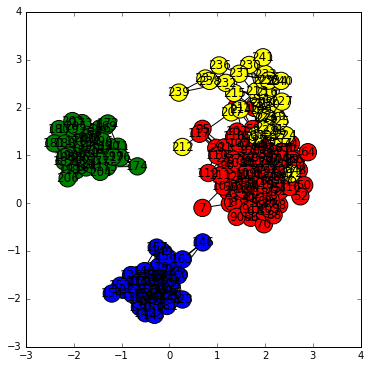

In [74]:
for i, g in enumerate(ccsubgraphs):
    for n in g.nodes():
        G_phys.node[n]['subgraph'] = i
        
# Then, pass in a list of nodecolors that correspond to the node order.
# Feel free to change the colours around!
node_cmap = {0: 'red', 1:'blue', 2: 'green', 3:'yellow'}
nodecolor = [node_cmap[G_phys.node[n]['subgraph']] for n in sorted(G_phys.nodes())]

nodes = sorted(G_phys.nodes())
edges = G_phys.edges()
edgeprops = dict(alpha=0.1)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
initial_pos = nx.random_layout(G_phys)
initial_pos[110] = (1,1)

nx.draw_networkx(G_phys,pos=nx.spring_layout(G_phys,k = 0.22, fixed=[110],pos=initial_pos), nodelist=nodes, edgelist=edges, ax=ax, fig=fig, edgeprops=edgeprops, node_color=nodecolor)

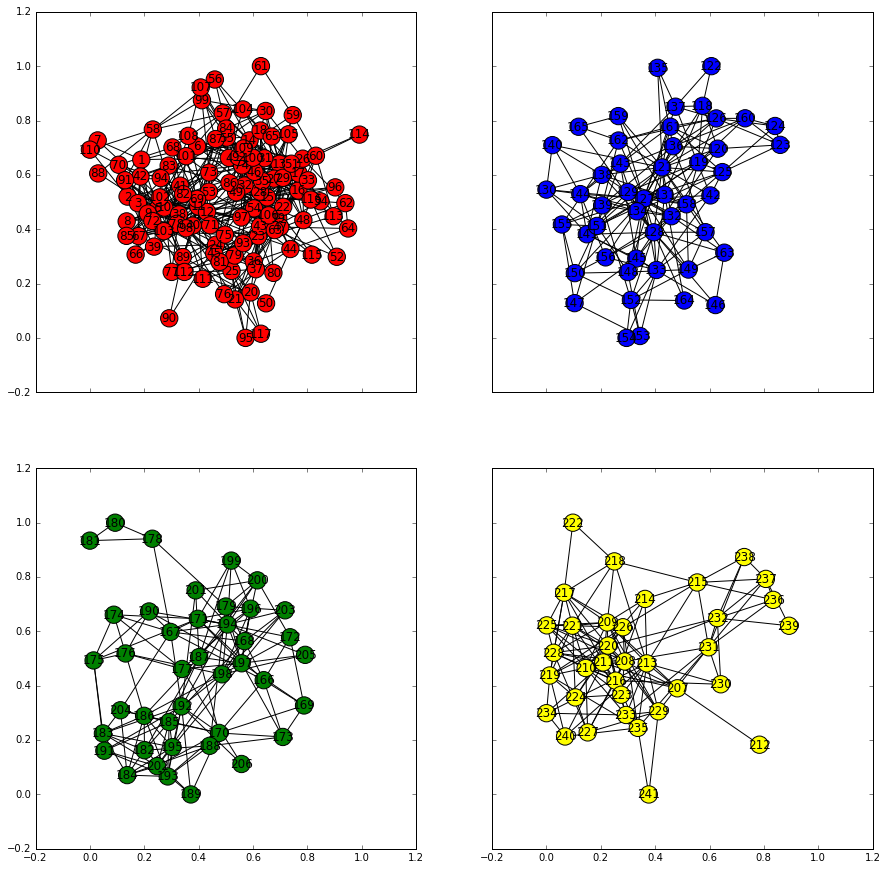

In [57]:
node_cmap = {0: 'red', 1:'blue', 2: 'green', 3:'yellow'}
pos_map = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15,15))
for i, g in enumerate(ccsubgraphs):
    for n in g.nodes():
        #G_phys.node[n]['subgraph'] = i
        
# Then, pass in a list of nodecolors that correspond to the node order.
# Feel free to change the colours around!
        nodecolor = [node_cmap[i] for n in sorted(g.nodes())]

        nodes = sorted(g.nodes())
        edges = g.edges()
        edgeprops = dict(alpha=0.1)


    #axes[i] = fig.add_subplot(111)

    nx.draw_networkx(g, nodelist=nodes, edgelist=edges, ax=axes[pos_map[i]], fig=fig, edgeprops=edgeprops, node_color=nodecolor)

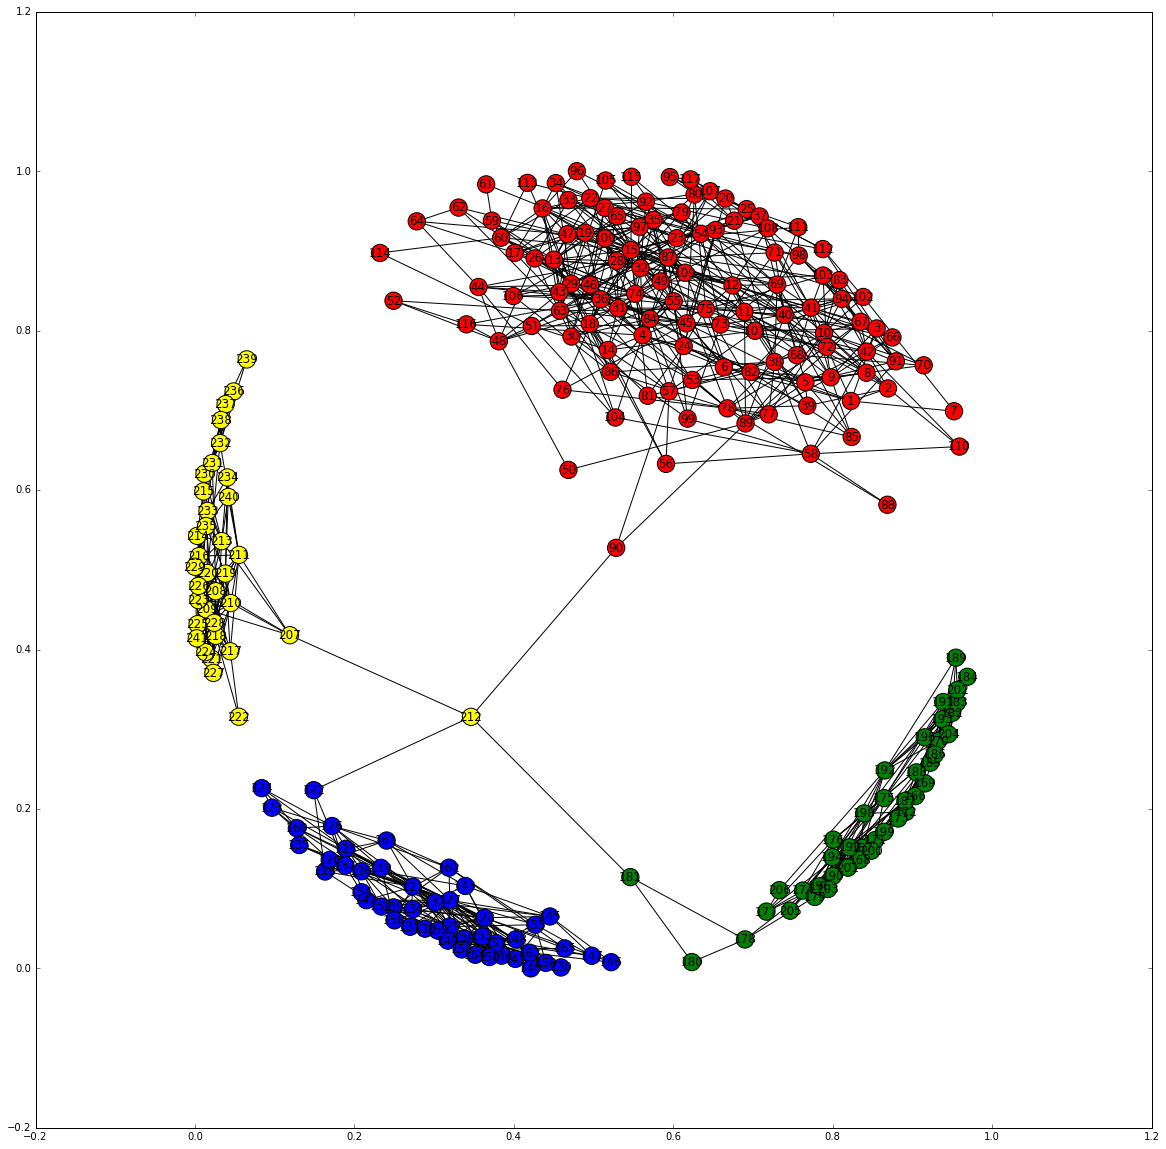

In [92]:
for i, g in enumerate(ccsubgraphs):
    for n in g.nodes():
        G_phys.node[n]['subgraph'] = i
        
# Then, pass in a list of nodecolors that correspond to the node order.
# Feel free to change the colours around!

node_cmap = {0: 'red', 1:'blue', 2: 'green', 3: 'yellow'}
nodecolor = [node_cmap[G_phys.node[n]['subgraph']] for n in sorted(G_phys.nodes())]

G_phys.add_edge(212,181)
G_phys.add_edge(212,122)
G_phys.add_edge(212,90)

nodes = sorted(G_phys.nodes())
edges = G_phys.edges()
edgeprops = dict(alpha=0.1)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
initial_pos = nx.random_layout(G_phys)
initial_pos[212] = (0,0)

nx.draw_networkx(G_phys,pos=nx.spring_layout(G_phys), nodelist=nodes, edgelist=edges, ax=ax, fig=fig, edgeprops=edgeprops, node_color=nodecolor)

In [93]:
communities = list(nx.k_clique_communities(G_phys))

TypeError: k_clique_communities() takes at least 2 arguments (1 given)